In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
data = pd.read_csv("estadistical.csv")

In [ ]:
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

In [ ]:
X = data.drop(columns=['Receive/ Not receive credit '])
y = data['Receive/ Not receive credit ']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)
knn_pred = neigh.predict(X_test_scaled)  # Changed from knn_classifier to neigh
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
print("Confusion Matrix for KNN:")
print(knn_conf_matrix)


c:\Users\prath\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KNN Accuracy: 0.705
Confusion Matrix for KNN:
[[141   0]
 [ 59   0]]


In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix for Random Forest:")
print(rf_conf_matrix)

Random Forest Accuracy: 0.805
Confusion Matrix for Random Forest:
[[131  10]
 [ 29  30]]


In [ ]:
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train_scaled, y_train)
logreg_pred = logreg_classifier.predict(X_test_scaled)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)
print("Confusion Matrix for Logistic Regression:")
print(logreg_conf_matrix)

Logistic Regression Accuracy: 0.78
Confusion Matrix for Logistic Regression:
[[127  14]
 [ 30  29]]


In [ ]:
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
svm_pred = svm_classifier.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)
svm_conf_matrix = confusion_matrix(y_test, svm_pred)
print("Confusion Matrix for SVM:")
print(svm_conf_matrix)

SVM Accuracy: 0.78
Confusion Matrix for SVM:
[[130  11]
 [ 33  26]]


In [ ]:
import sklearn
print(sklearn.__version__)


1.2.2


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.67 0.33 0.  ]
 [0.   1.   0.  ]
 [0.33 0.   0.67]]


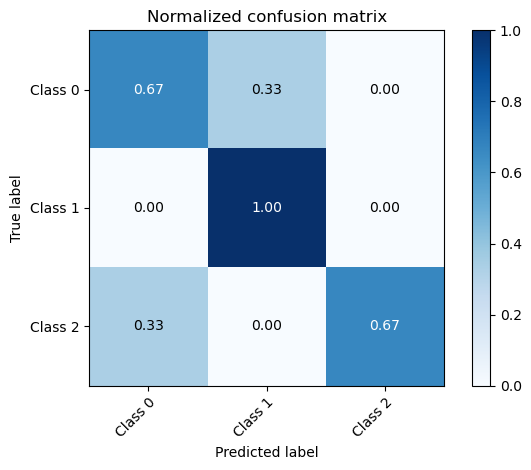

In [ ]:
y_true = np.array([0, 1, 2, 0, 1, 2, 0, 1, 2])  # True labels
y_pred = np.array([0, 1, 2, 1, 1, 0, 0, 1, 2])  # Predicted labels
classes = np.array(['Class 0', 'Class 1', 'Class 2'])  # Class names

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=classes, normalize=True, title='Normalized confusion matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7777777777777778


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [ ]:
num_features_to_select = 10
rfe = RFE(estimator=rf_classifier, n_features_to_select=num_features_to_select)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]

In [ ]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('logreg', LogisticRegression())
]

In [ ]:
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [ ]:
stacking_cv_scores = cross_val_score(stacking_classifier, X_train_selected, y_train, cv=5)

c:\Users\prath\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prath\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [ ]:
stacking_classifier.fit(X_train_selected, y_train)
stacking_accuracy = stacking_classifier.score(X_test_selected, y_test)

c:\Users\prath\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prath\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [ ]:
print("Selected Features:", selected_features)
print("Accuracy for Stacking Classifier on Test Data:", stacking_accuracy)

Selected Features: Index(['Status of existing checking account', 'Duration in month',
       'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds',
       'Present employment since', 'Present residence since', 'Property',
       'Age in years'],
      dtype='object')
Accuracy for Stacking Classifier on Test Data: 0.79
